# Task3

# Combining all the dataset

In [1]:
import pandas as pd
import glob
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#2021 files
path_2021 = r'data2021'   ######## use your path #########
all_files_2021 = glob.glob(os.path.join(path_2021, "*.csv"))

df_from_each_file_2021 = (pd.read_csv(f) for f in all_files_2021)
concatenated_df_2021 = pd.concat(df_from_each_file_2021, ignore_index=True)

#2022 files
path_2022 = r'data2022'   ###### use your path ###########
all_files_2022 = glob.glob(os.path.join(path_2022, "*.csv"))  
df_from_each_file_2022 = (pd.read_csv(f) for f in all_files_2022)
concatenated_df_2022 = pd.concat(df_from_each_file_2022, ignore_index=True)

#Combining into 1 single dataset
fr = concatenated_df_2021.append(concatenated_df_2022)
fr.head()

,PrimaryActivityCode,SecondaryActivityCode,DescriptiveLabel,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore,...,Start date,Start time (in AM/PM),End time (in AM/PM),Duration,Did you plan your schedule for the coming day?(Answer once in a day),Did you use your mobile phone as soon as you wake up? (Answer once in a day),"If your answer to the previous question is yes, please enter the duration. (Enter the number of min spent as a number)",MoodScore,ActivityPlanned,ActivityTimeEfficient
0,S801,,Sleeping,08/03/2021,24.0,Monday,00:00,07:00,420.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,O733,,Getting ready,08/03/2021,24.0,Monday,07:00,07:30,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,X893,UD415,Exercising while listening music,08/03/2021,24.0,Monday,07:30,08:15,45.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ED152,,Breakfast,08/03/2021,24.0,Monday,08:15,08:45,29.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CW982,,ADS Lab 3,08/03/2021,24.0,Monday,08:45,11:15,150.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Dealing with data wrengling issue

In [2]:
#exclude personal identified info
df = fr[['PrimaryActivityCode', 'SecondaryActivityCode', 'StartDate', 'UniBathWeekNo', 'DayOfWeek', 'StartTime', 'EndTime', 'DurationMins', 'EnjoymentScore']]

## drop the rows with all Nans
df = df.dropna(how='all')

#drop rows with unrecognisable PrimaryActivityCode
valid_code = ['ED145',
                 'EL642',
                 'X893',
                 'H179',
                 'L418',
                 'R523',
                 'S801',
                 'T695',
                 'UD415',
                 'PW101',
                 'CW982',
                 'O733']
   
#Define a function to get the Activity Name
def get_name(x):
    if x == 'ED145':
        return 'Eating/Drinking'
    elif x == 'EL642':
        return 'Education/Lectures'
    elif x == 'X893':
        return 'Exercise'
    elif x == 'H179':
        return 'Housework'
    elif x == 'L418':
        return 'Leisure'
    elif x == 'R523':
        return 'Reading'
    elif x == 'S801':
        return 'Sleep'
    elif x == 'T695':
        return 'Travelling'
    elif x == 'UD415':
        return 'Using Devices'
    elif x == 'PW101':
        return 'Paid Work'
    elif x == 'CW982':
        return 'Coursework'
    elif x == 'O733':
        return 'Other'
    
df = df[df['PrimaryActivityCode'].isin(valid_code)]
df['ActivityName'] = df['PrimaryActivityCode'].apply(get_name)
first_column = df.pop('ActivityName')
df.insert(1, 'ActivityName',first_column)

#drop rows with blank value on PrimaryActivityCode and StartDate
df['StartDate'].replace('', np.nan, inplace=True)
df['PrimaryActivityCode'].replace('', np.nan, inplace=True)
df['DurationMins'].replace('', np.nan, inplace=True)
df.dropna(subset=['StartDate', 'PrimaryActivityCode','DurationMins'], inplace=True)
    



# Ensure all the date value is in same format
df['StartDate'] = pd.to_datetime(df['StartDate'], errors = 'coerce')

# Ensure all the time value is in same format

df['StartTime'] = df['StartTime'].astype('str') 
df['EndTime'] = df['EndTime'].astype('str') 
df['StartTime'] = df['StartTime'].str[:5]
df['EndTime'] = df['EndTime'].str[:5]

## Ensure DurationMins < 24hours
df = df[df['DurationMins']<=1440]

## Reset index
df = df.reset_index()
df = df.drop(columns=['index'])
df.head()

,PrimaryActivityCode,ActivityName,SecondaryActivityCode,StartDate,UniBathWeekNo,DayOfWeek,StartTime,EndTime,DurationMins,EnjoymentScore
0,S801,Sleep,,2021-08-03,24.0,Monday,00:00,07:00,420.0,2.0
1,O733,Other,,2021-08-03,24.0,Monday,07:00,07:30,29.0,1.0
2,X893,Exercise,UD415,2021-08-03,24.0,Monday,07:30,08:15,45.0,2.0
3,CW982,Coursework,,2021-08-03,24.0,Monday,08:45,11:15,150.0,1.0
4,H179,Housework,,2021-08-03,24.0,Monday,11:15,11:45,29.0,-1.0


# Questions for analysis

1. What is the average hours spent group by each activity?
2. What is the average sleeping time of Bath students?
3. Which most enjoyable activity ranking for Bath students?
4. What is the average time spend on school-related work?
5. what is the percentage of time spend on exercise?

In [3]:
#Attempt to answer above question using the cleased dataset
#1. What is the total time spent group by each activity?
#Method: to group by the duration minutes of each group activity
df_Q1 = (df.groupby(['ActivityName']).mean())/60
df_Q1['HoursSpent'] = df_Q1[['DurationMins']]
df_Q1 = df_Q1[['HoursSpent']]
df_Q1['HoursSpent'] = df_Q1['HoursSpent'].apply(lambda x: round(x, 1))
df_Q1

,HoursSpent
ActivityName,
Coursework,2.2
Eating/Drinking,0.8
Education/Lectures,1.8
Exercise,1.1
Housework,0.9
Leisure,1.6
Other,0.7
Paid Work,3.8
Reading,1.5


Analyse result: From the result we can see the average hour spent grouped by each actvity group.

In [4]:
# 2.What is the average sleeping time of Bath students?
# Method: isolate the sleeping time from the whole group
df_Q2 = df_Q1.reset_index()
df_Q2 = df_Q2[df_Q2['ActivityName'] == 'Sleep']
df_Q2 

,ActivityName,HoursSpent
9,Sleep,6.9


Analyse result: From the result we can see the average sleep hours is 6.9 hours.

In [5]:
# 3.Which most enjoyable activity ranking for Bath students?
# Method: Get the mean enjoyment score by activity name and sort by descending.
df_Q3 = (df.groupby(['ActivityName']).mean())
df_Q3 = df_Q3[['EnjoymentScore']]
df_Q3['EnjoymentScore'] = df_Q3['EnjoymentScore'].apply(lambda x: round(x, 1))
df_Q3.sort_values(by='EnjoymentScore', ascending=False)

,EnjoymentScore
ActivityName,
Leisure,1.4
Exercise,1.3
Eating/Drinking,1.2
Sleep,1.2
Using Devices,1.1
Reading,0.7
Other,0.6
Travelling,0.2
Education/Lectures,0.1


From the result we can see Leisure activity leads the rank with enjoyment score 1.4.

In [6]:
#4. What is the average time spend on school-related work?
#Method: Filter out school-related work and sum the total
df_Q4 = df_Q1.reset_index()
df_Q4 = df_Q4[df_Q4['ActivityName'].isin(['Education/Lectures', 'Coursework'])]
df_Q4.loc["Total"] = df_Q4.sum()
df_Q4['ActivityName'] = df_Q4['ActivityName'].apply(lambda x: 'School-related work' if  x == 'CourseworkEducation/Lectures' else x)
df_Q4

,ActivityName,HoursSpent
0,Coursework,2.2
2,Education/Lectures,1.8
Total,School-related work,4.0


From the result, we can see 4 hours per day is spent on school-related work.

In [7]:
#5. what is the percentage of time spend on exercise?
df_Q5 = df_Q1.reset_index()

df_Q5['percent'] = (df_Q5['HoursSpent'] / 
                  df_Q5['HoursSpent'].sum()) * 100

df_Q5 = df_Q5[['ActivityName', 'percent']]
df_Q5['percent']= df_Q5['percent'].apply(lambda x: round(x, 1))
df_Q5

,ActivityName,percent
0,Coursework,9.5
1,Eating/Drinking,3.5
2,Education/Lectures,7.8
3,Exercise,4.8
4,Housework,3.9
5,Leisure,6.9
6,Other,3.0
7,Paid Work,16.5
8,Reading,6.5
9,Sleep,29.9


From the result, we can see Bath student spend less than 5% of their time on exercise

# Hypotheses

A study shows that the exercise time for university student is far less compare to teenagers before entering university (BMC Public Health, 2019).
From our data collected, I want to make the assumption that due to heavy school-work, student spends more time on studying than in exercise.

# Hypotheses - Testing

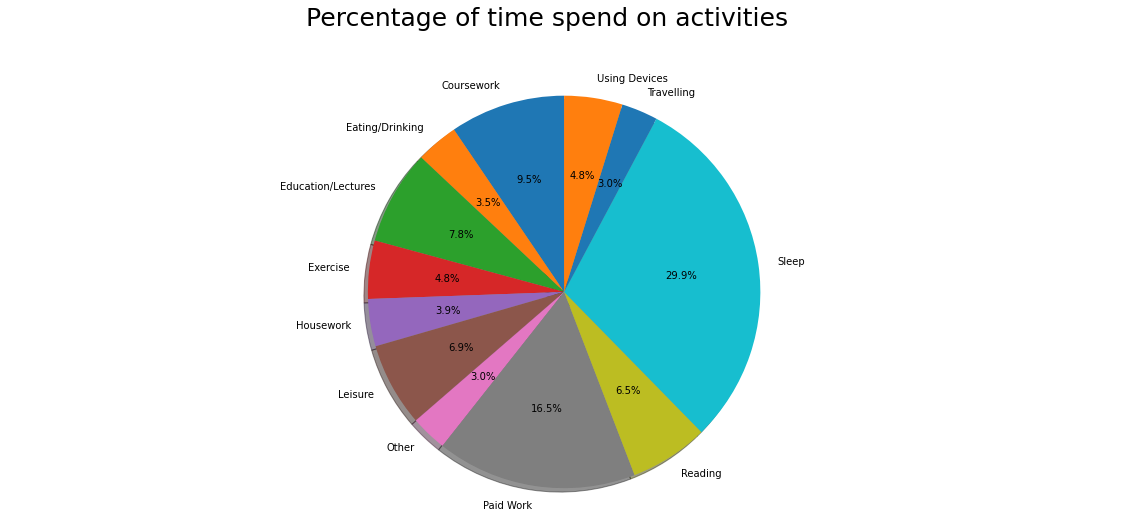

In [8]:
import matplotlib.pyplot as plt

#Method
##1. Make use of the dataframe of Q5 above: Percentage of time spend on activities
##2. Plot a chart to compare the percentage difference between exercise and school-work
xlabel = df_Q5['ActivityName']
ylabel = df_Q5['percent']
plt.figure(figsize=(20,8))
plt.pie(ylabel,labels=xlabel,autopct='%1.1f%%', startangle=90, shadow = True)
plt.suptitle('Percentage of time spend on activities', size=25, y=1)
plt.xticks(fontsize=25)
plt.axis('equal')
plt.savefig("Percentage of time spend on activities")
plt.show()

# Hypotheses - Result

The result matches our assumption. As exercise accounts for only 4.8% of time spent.

While time spent on Coursework and Education/Lectures accounts for > 17%.

# Deal with public dataset

In [9]:
#Import public dataset from:
#https://ec.europa.eu/eurostat/data/database?node_code=tus_00age

#cleasing the public dataset
#Method: 
##Removing unnecessary columns
##Focus on data of United Kingdom
pd.options.mode.chained_assignment = None
df_p = pd.read_csv('tus_00age_1_Data.csv')
df_p = df_p.drop('Flag and Footnotes',axis=1)
df_p = df_p[df_p['UNIT'] == 'Time spent (hh:mm)']
df_p = df_p[df_p['ACL00'] != 'Total']
df_p = df_p[df_p['GEO'] == 'United Kingdom']
df_p = df_p.reset_index()
df_p = df_p.drop(columns=['index'])
df_p

,UNIT,ACL00,TIME,SEX,AGE,GEO,Value
0,Time spent (hh:mm),Personal care,2000,Total,Total,United Kingdom,10:33
1,Time spent (hh:mm),Personal care,2010,Total,Total,United Kingdom,10:43
2,Time spent (hh:mm),Sleep,2000,Total,Total,United Kingdom,8:23
3,Time spent (hh:mm),Sleep,2010,Total,Total,United Kingdom,8:22
4,Time spent (hh:mm),Eating,2000,Total,Total,United Kingdom,1:25
...,...,...,...,...,...,...,...
105,Time spent (hh:mm),"Travel related to leisure, social and associat...",2010,Total,Total,United Kingdom,0:29
106,Time spent (hh:mm),Unspecified travel,2000,Total,Total,United Kingdom,0:01
107,Time spent (hh:mm),Unspecified travel,2010,Total,Total,United Kingdom,0:08
108,Time spent (hh:mm),Unspecified time use,2000,Total,Total,United Kingdom,0:09


# Hypotheses

When comparing the time spent between Bath students and UK citizen, I have a strong belief that amount of time spend on specific areas will have a vast difference.

Areas including:
1. Study
2. Exercise
3. Leisure

The reason for this is because student have heavy work-load on school-related work, and therefore having fewer time for exercise and leisure activities.

# Hypotheses - Testing

In [10]:
##Method: Indicated as comment in the code
#Re-organise the activity label for public dataset
#To make the activity label same with our own dataset
def rename_public(x):
    if x == 'Eating':
        return 'Eating/Drinking'
    
    elif x == 'Study' or x == 'Free time study':
        return 'Education/Lectures'
    
    elif x == 'Walking and hiking' or x == 'Sports and outdoor activities except walking and hiking':
        return 'Exercise'
        
    elif x == 'Reading books':
        return 'Reading'
    
    elif x == 'Cleaning dwelling' or x == 'Dish washing' or x == 'Household upkeep except cleaning dwelling' or x == 'Laundry' or x == 'Ironing':
        return 'Housework'
    
    elif x == 'Household and family care' or x == 'Shopping and services' or x == 'TV and video' or x == 'Leisure, social and associative life' or x == 'Participatory activities' or x == 'Visiting and feasts' or x == 'Other social life' or x == 'Entertainment and culture' or x == 'Hobbies and games except computing and computer games' or x == 'Radio and music':
        return 'Leisure'

    
    elif x == 'Sleep' or x == 'Resting':
        return 'Sleep'
    
    elif x == 'Main and second job and related travel' or x == 'Travel except travel related to jobs' or x == 'Travel to/from work' or x == 'Travel related to study' or x == 'Travel related to shopping and services' or x == 'Transporting a child' or x == 'Travel related to other household purposes' or x == 'Travel related to leisure, social and associative life' or x == 'Unspecified travel':
        return 'Travelling'
    
    elif x == 'Computer games' or x == 'Computing':
        return 'Using Devices'
    
    elif x == 'Employment, related activities and travel as part of/during main and second job' or x == 'Activities related to employment and unspecified employment':
        return 'Paid Work'
    
    elif x == 'School and university except homework' or x == 'Homework':
        return 'Coursework'
    
    else:
        return 'Other'
    
df_p['ACL00'] = df_p['ACL00'].apply(rename_public)

#filter out only time-spent for 2010
df_p = df_p[df_p['TIME'] == 2010]

#Change value to Hour-spent
time = pd.DatetimeIndex(df_p['Value'])
Time_spent = time.hour * 60 + time.minute
df_p['Time_spent'] = list(Time_spent)
df_p['Hour_spent'] = df_p['Time_spent'].apply(lambda x: round(x/60,1))
df_p = df_p[['ACL00','Hour_spent']]
df_p = df_p[df_p['ACL00']!='Other']

#Merging bath dataset and public dataset on ActivityName
df_bath = df_Q1.reset_index()
df_p_group = (df_p.groupby(['ACL00']).sum())
df_p_group = df_p_group.reset_index()
df_p_group = df_p_group.rename({'ACL00':'ActivityName'}, axis=1) 
df_merge = pd.merge(df_bath, df_p_group, on='ActivityName')
df_merge = df_merge.rename({'HoursSpent':'Hours_Spent(Bath)', 'Hour_spent':'Hours_Spent(UK)'}, axis=1) 
df_merge

,ActivityName,Hours_Spent(Bath),Hours_Spent(UK)
0,Coursework,2.2,0.3
1,Eating/Drinking,0.8,1.4
2,Education/Lectures,1.8,0.5
3,Exercise,1.1,0.3
4,Housework,0.9,0.9
5,Leisure,1.6,12.3
6,Paid Work,3.8,2.7
7,Reading,1.5,0.1
8,Sleep,6.9,8.7
9,Travelling,0.7,5.9


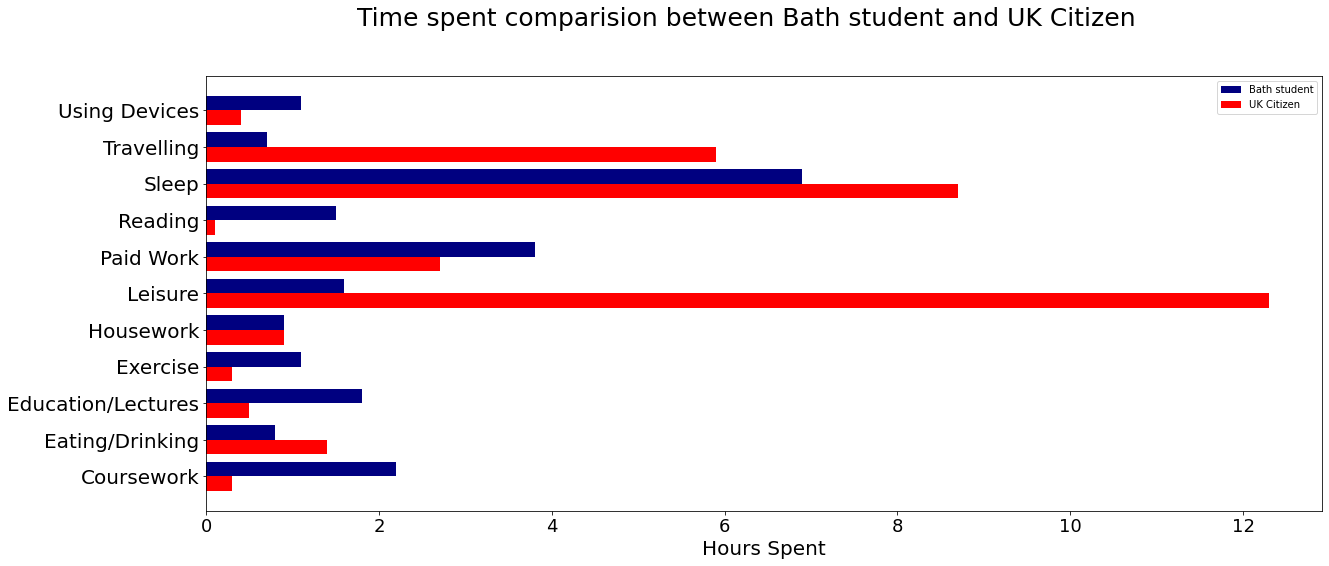

In [11]:
#Plotting graph for data visualiztion
fig, ax = plt.subplots(figsize=(20,8))
legends = ['Bath student', 'UK Citizen']
width=0.4

labels = df_merge['ActivityName']
x = np.arange(len(labels))

bath = plt.barh(x, df_merge['Hours_Spent(Bath)'], width, label="Bar 1", color='navy')
uk = plt.barh(x - width, df_merge['Hours_Spent(UK)'], width, label="Bar 2", color='red')

ax.set(yticks=x-width/2, yticklabels=labels)


plt.legend(legends)

plt.suptitle('Time spent comparision between Bath student and UK Citizen', size=25, y=1)
plt.yticks(fontsize=20)
plt.xlabel('Hours Spent',fontsize=20)
plt.xticks(fontsize=18)
plt.show()
fig.savefig('Time spent comparision.png')

# Hypotheses - Result

Result shows that our hypothesis is partially correct.

While Study and Leisure have a substantial different in time spent, exercise seems to have a smaller different. The conclusion is the fact of being a student has a large impact on the study and leisure balance, however it does not impact the time on exercise as much.

# Reference

BMC Public Health, 2019. Pattern of physical exercise practice among university students in the Kingdom of Saudi Arabia (before beginning and during college): a cross-sectional study [online] Available from: https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-019-8093-2 [Accessed 26 Mar 2022]